## 選手ごとのテーブルをスクレイピングする
- 対象サイト
    - https://baseball-data.com/stats/hitter-g/
- 各打者のページのURLを貼る


In [2]:
import requests
from bs4 import BeautifulSoup
import re

In [3]:
# FQDNの定義
# https://www.kagoya.jp/howto/network/fqdn/

def extract_hostname(url):
    host_name = re.search(r"https?://(.*?)/", url_name + "/").group()
    return host_name[:-1]

In [4]:
url_name = "https://baseball-data.com/player/g/%E9%99%BD%E3%80%80%E5%B2%B1%E9%8B%BC" # 陽岱鋼
#url_name = "https://baseball-data.com/player/g/小林%E3%80%80誠司" # 小林誠司

host_name = extract_hostname(url_name)
print(host_name)
url = requests.get(url_name)

https://baseball-data.com


In [5]:
# htmlファイルの中身を吐き出す
soup = BeautifulSoup(url.content, "lxml")

elems = soup.select("table.tablesorter.stats")


for elem in elems: 
    for ch in elem.children:
        try:
            print(ch, end=", ")
        except AttributeError:
            print("Attribute Error", ch)
    print()


, <thead>
<tr>
<th>試<br/>合</th><th>打<br/>席<br/>数</th><th>打<br/>数</th><th>得<br/>点</th><th>安<br/>打</th><th>二<br/>塁<br/>打</th><th>三<br/>塁<br/>打</th><th>本<br/>塁<br/>打</th><th>塁<br/>打</th><th>打<br/>点</th><th>盗<br/>塁</th><th>盗<br/>塁<br/>刺</th><th>犠<br/>打</th><th>犠<br/>飛</th><th>四<br/>球</th><th>敬<br/>遠</th><th>死<br/>球</th><th>三<br/>振</th><th>併<br/>殺<br/>打</th><th>打<br/>率</th><th>出<br/>塁<br/>率</th><th>長<br/>打<br/>率</th>
</tr>
</thead>, 
, <tbody>
<tr><td>27</td><td>56</td><td>45</td><td>12</td><td>11</td><td>1</td><td>0</td><td>1</td><td>15</td><td>5</td><td>1</td><td>0</td><td>0</td><td>2</td><td>7</td><td>0</td><td>2</td><td>11</td><td>1</td><td>.244</td><td>.357</td><td>.333</td></tr>
</tbody>, 
, 

, <thead>
<tr>
<th>O<br/>P<br/>S</th><th>N<br/>O<br/>I</th><th>G<br/>P<br/>A</th><th>I<br/>s<br/>o<br/>P</th><th>I<br/>s<br/>o<br/>D</th><th>R<br/>C</th><th>R<br/>C<br/>2<br/>7</th><th>X<br/>R</th><th>X<br/>R<br/>2<br/>7</th><th>B<br/>A<br/>B<br/>I<br/>P</th><th>S<br/>e<br/>c<br/>A</th><th>T<br

In [7]:
# htmlファイル内の tableタグを取得
tables = soup.select("table.tablesorter.stats")

table_head_list = []
table_body_list = []
for table in tables:
    table_head_list.append(table.select("thead"))
    table_body_list.append(table.select("tbody"))
print(tables)

[<table cellspacing="1" class="tablesorter stats">
<thead>
<tr>
<th>試<br/>合</th><th>打<br/>席<br/>数</th><th>打<br/>数</th><th>得<br/>点</th><th>安<br/>打</th><th>二<br/>塁<br/>打</th><th>三<br/>塁<br/>打</th><th>本<br/>塁<br/>打</th><th>塁<br/>打</th><th>打<br/>点</th><th>盗<br/>塁</th><th>盗<br/>塁<br/>刺</th><th>犠<br/>打</th><th>犠<br/>飛</th><th>四<br/>球</th><th>敬<br/>遠</th><th>死<br/>球</th><th>三<br/>振</th><th>併<br/>殺<br/>打</th><th>打<br/>率</th><th>出<br/>塁<br/>率</th><th>長<br/>打<br/>率</th>
</tr>
</thead>
<tbody>
<tr><td>27</td><td>56</td><td>45</td><td>12</td><td>11</td><td>1</td><td>0</td><td>1</td><td>15</td><td>5</td><td>1</td><td>0</td><td>0</td><td>2</td><td>7</td><td>0</td><td>2</td><td>11</td><td>1</td><td>.244</td><td>.357</td><td>.333</td></tr>
</tbody>
</table>, <table cellspacing="1" class="tablesorter stats">
<thead>
<tr>
<th>O<br/>P<br/>S</th><th>N<br/>O<br/>I</th><th>G<br/>P<br/>A</th><th>I<br/>s<br/>o<br/>P</th><th>I<br/>s<br/>o<br/>D</th><th>R<br/>C</th><th>R<br/>C<br/>2<br/>7</th><th>X<br/>R</th><t

In [6]:
# テーブル列名の整形
column_doms_list = []
for head in table_head_list:
    for dom in head:
        column_doms = dom.select("th")
        column_doms_list.append(column_doms)
        

column_names_list =[]
for column_doms in column_doms_list:
    column_names = []
    for dom in column_doms:
        column_names.append(dom.text)
    column_names_list.append(column_names)
    
[print(cols) for cols in column_names_list];

['試合', '打席数', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打', '塁打', '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '敬遠', '死球', '三振', '併殺打', '打率', '出塁率', '長打率']
['OPS', 'NOI', 'GPA', 'IsoP', 'IsoD', 'RC', 'RC27', 'XR', 'XR27', 'BABIP', 'SecA', 'TA', '本塁打率', '三振率', '四球率', 'PSN', 'BB/K']
['年度', '球団', '試合', '打席数', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打', '塁打', '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '死球', '三振', '併殺打', '打率', '出塁率', '長打率', 'OPS']


In [7]:
# テーブルごとに分割
dom_rows_list = []
for body in table_body_list:
    for dom in body:
        dom_rows = dom.select("tr")
        dom_rows_list.append(dom_rows)

# 行ごとに分割
table_rows_list =[]
for dom_row in dom_rows_list:
    rows = []
    for item in dom_row:
        dom = item.select("td")
        rows.append(dom)

    table_rows_list.append(rows)

# 要素ごとに 文字列にparseする
table_matrix_list = []
for dom_rows in table_rows_list:
    rows = []
    for dom_row in dom_rows:
        row = []
        for dom in dom_row:
            row.append(dom.text)
        rows.append(row)
    table_matrix_list.append(rows)
    
    
[print(row) for matrix in table_matrix_list for row in matrix];

['14', '33', '31', '8', '8', '1', '0', '1', '12', '3', '1', '0', '0', '0', '2', '0', '0', '7', '1', '.258', '.303', '.387']
['.690', '.432', '.233', '.129', '.045', '3.55', '3.99', '3.52', '3.96', '.304', '.226', '.625', '31.00', '4.71', '16.50', '1.00', '0.29']
['2007', '北海道日本ハム', '55', '116', '109', '12', '26', '8', '2', '0', '38', '10', '3', '2', '4', '0', '2', '1', '30', '0', '.239', '.259', '.349', '.608']
['2008', '北海道日本ハム', '44', '123', '111', '7', '16', '0', '1', '2', '24', '4', '1', '0', '4', '1', '6', '1', '31', '3', '.144', '.193', '.216', '.409']
['2009', '北海道日本ハム', '15', '13', '11', '2', '2', '0', '0', '0', '2', '0', '0', '0', '1', '0', '1', '0', '3', '0', '.182', '.250', '.182', '.432']
['2010', '北海道日本ハム', '109', '281', '253', '35', '62', '12', '3', '2', '86', '31', '8', '1', '10', '2', '12', '4', '70', '4', '.245', '.288', '.340', '.628']
['2011', '北海道日本ハム', '141', '603', '537', '66', '147', '23', '4', '6', '196', '36', '19', '2', '38', '1', '22', '5', '134', '5', '.274'

In [8]:
# リスト内の文字列を数値に変換する
for matrix in table_matrix_list:
    for row in matrix:
        for idx in range(0, len(row)):
            try:
                row[idx] = float(row[idx])
            except:
                pass
                        
[print(row) for matrix in table_matrix_list for row in matrix];

[14.0, 33.0, 31.0, 8.0, 8.0, 1.0, 0.0, 1.0, 12.0, 3.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 7.0, 1.0, 0.258, 0.303, 0.387]
[0.69, 0.432, 0.233, 0.129, 0.045, 3.55, 3.99, 3.52, 3.96, 0.304, 0.226, 0.625, 31.0, 4.71, 16.5, 1.0, 0.29]
[2007.0, '北海道日本ハム', 55.0, 116.0, 109.0, 12.0, 26.0, 8.0, 2.0, 0.0, 38.0, 10.0, 3.0, 2.0, 4.0, 0.0, 2.0, 1.0, 30.0, 0.0, 0.239, 0.259, 0.349, 0.608]
[2008.0, '北海道日本ハム', 44.0, 123.0, 111.0, 7.0, 16.0, 0.0, 1.0, 2.0, 24.0, 4.0, 1.0, 0.0, 4.0, 1.0, 6.0, 1.0, 31.0, 3.0, 0.144, 0.193, 0.216, 0.409]
[2009.0, '北海道日本ハム', 15.0, 13.0, 11.0, 2.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.182, 0.25, 0.182, 0.432]
[2010.0, '北海道日本ハム', 109.0, 281.0, 253.0, 35.0, 62.0, 12.0, 3.0, 2.0, 86.0, 31.0, 8.0, 1.0, 10.0, 2.0, 12.0, 4.0, 70.0, 4.0, 0.245, 0.288, 0.34, 0.628]
[2011.0, '北海道日本ハム', 141.0, 603.0, 537.0, 66.0, 147.0, 23.0, 4.0, 6.0, 196.0, 36.0, 19.0, 2.0, 38.0, 1.0, 22.0, 5.0, 134.0, 5.0, 0.274, 0.308, 0.365, 0.673]
[2012.0, '北海道日本ハム', 144.0, 59

In [9]:
# 通算値のNan埋めをする
table_matrix_list[-1][-1].insert(1, None)
print(table_matrix_list[-1][-1])

['通算', None, 1291.0, 4790.0, 4268.0, 582.0, 1156.0, 189.0, 25.0, 105.0, 1710.0, 479.0, 141.0, 40.0, 102.0, 19.0, 339.0, 62.0, 1080.0, 78.0, 0.271, 0.332, 0.401, 0.733]


In [10]:
# Pandasに変換し、解析しやすくする
import numpy as np
import pandas as pd

for idx in range(0, len(table_matrix_list)):
    df = pd.DataFrame(table_matrix_list[idx])
    df.columns = column_names_list[idx]
    display(df)

,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,...,犠打,犠飛,四球,敬遠,死球,三振,併殺打,打率,出塁率,長打率
0,14.0,33.0,31.0,8.0,8.0,1.0,0.0,1.0,12.0,3.0,...,0.0,0.0,2.0,0.0,0.0,7.0,1.0,0.258,0.303,0.387


,OPS,NOI,GPA,IsoP,IsoD,RC,RC27,XR,XR27,BABIP,SecA,TA,本塁打率,三振率,四球率,PSN,BB/K
0,0.69,0.432,0.233,0.129,0.045,3.55,3.99,3.52,3.96,0.304,0.226,0.625,31.0,4.71,16.5,1.0,0.29


,年度,球団,試合,打席数,打数,得点,安打,二塁打,三塁打,本塁打,...,犠打,犠飛,四球,死球,三振,併殺打,打率,出塁率,長打率,OPS
0,2007,北海道日本ハム,55.0,116.0,109.0,12.0,26.0,8.0,2.0,0.0,...,4.0,0.0,2.0,1.0,30.0,0.0,0.239,0.259,0.349,0.608
1,2008,北海道日本ハム,44.0,123.0,111.0,7.0,16.0,0.0,1.0,2.0,...,4.0,1.0,6.0,1.0,31.0,3.0,0.144,0.193,0.216,0.409
2,2009,北海道日本ハム,15.0,13.0,11.0,2.0,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,3.0,0.0,0.182,0.250,0.182,0.432
3,2010,北海道日本ハム,109.0,281.0,253.0,35.0,62.0,12.0,3.0,2.0,...,10.0,2.0,12.0,4.0,70.0,4.0,0.245,0.288,0.340,0.628
4,2011,北海道日本ハム,141.0,603.0,537.0,66.0,147.0,23.0,4.0,6.0,...,38.0,1.0,22.0,5.0,134.0,5.0,0.274,0.308,0.365,0.673
5,2012,北海道日本ハム,144.0,599.0,533.0,71.0,153.0,28.0,5.0,7.0,...,18.0,5.0,37.0,6.0,123.0,10.0,0.287,0.337,0.398,0.735
6,2013,北海道日本ハム,144.0,658.0,574.0,93.0,162.0,27.0,2.0,18.0,...,4.0,2.0,69.0,9.0,142.0,9.0,0.282,0.367,0.430,0.797
7,2014,北海道日本ハム,125.0,540.0,471.0,77.0,138.0,18.0,1.0,25.0,...,9.0,3.0,45.0,12.0,108.0,10.0,0.293,0.367,0.495,0.862
8,2015,北海道日本ハム,86.0,381.0,352.0,47.0,91.0,10.0,2.0,7.0,...,2.0,2.0,21.0,4.0,93.0,4.0,0.259,0.306,0.358,0.664
9,2016,北海道日本ハム,130.0,555.0,495.0,66.0,145.0,24.0,1.0,14.0,...,7.0,1.0,42.0,10.0,121.0,10.0,0.293,0.359,0.430,0.790


/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 36890 missing from current font.
  font.set_text(s, 0, flags=flags)
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 31639 missing from current font.
  font.set_text(s, 0, flags=flags)


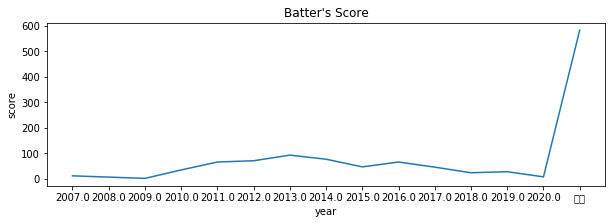

In [11]:
# matplotで可視化する
import matplotlib.pyplot as plt

plt.figure(figsize=(10,3))
plt.plot(df["得点"]);
plt.xticks(range(0,len(df["得点"])),df["年度"]);
plt.xlabel("year");plt.ylabel("score");
plt.title("Batter's Score");
plt.show()